<a href="https://colab.research.google.com/github/Rahulpoddar477/CIFAR10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass classification on CIFAR10

In [ ]:
#Importing necessary library

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
#Loading of data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

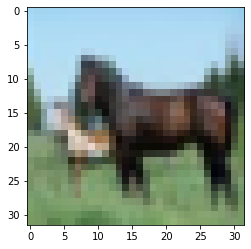

In [ ]:
#View data
plt.imshow(X_train[12])

In [ ]:
#Shape of data
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
#Classes name
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
#Normalizing of data
X_train = X_train/255
X_test = X_test/255
print(X_train[12])

[[[0.64313725 0.84313725 0.95686275]
  [0.63529412 0.83137255 0.94117647]
  [0.63529412 0.83137255 0.94117647]
  ...
  [0.61568627 0.82352941 0.92941176]
  [0.6        0.81568627 0.92156863]
  [0.6        0.79607843 0.91764706]]

 [[0.65882353 0.85490196 0.96078431]
  [0.65098039 0.84313725 0.94901961]
  [0.65098039 0.84313725 0.94901961]
  ...
  [0.64313725 0.83137255 0.93333333]
  [0.62745098 0.81960784 0.9254902 ]
  [0.61960784 0.80392157 0.92156863]]

 [[0.6745098  0.8627451  0.96470588]
  [0.66666667 0.85098039 0.95294118]
  [0.67058824 0.85490196 0.95686275]
  ...
  [0.65882353 0.83137255 0.93333333]
  [0.64705882 0.81568627 0.92156863]
  [0.63921569 0.81176471 0.9254902 ]]

 ...

 [[0.48235294 0.62745098 0.41176471]
  [0.45882353 0.60392157 0.4       ]
  [0.43921569 0.58431373 0.38823529]
  ...
  [0.45882353 0.53333333 0.39215686]
  [0.37254902 0.45098039 0.30980392]
  [0.47058824 0.58431373 0.39215686]]

 [[0.47058824 0.61176471 0.39215686]
  [0.45490196 0.59215686 0.38823529]


In [ ]:
#One hot encoding of output
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [ ]:
#Building Model
model =  Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
#model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Training of model

In [ ]:
#Data augmentation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, 
                             width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
#Training of model
history = model.fit_generator( datagen.flow(X_train, y_train_cat, batch_size=64), steps_per_epoch=len(X_train) / 64, epochs=80, validation_data=(X_test, y_test_cat))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


782/781 [==============================] - 445s 569ms/step - loss: 1.8908 - accuracy: 0.3468 - val_loss: 1.3848 - val_accuracy: 0.5036
Epoch 2/80
782/781 [==============================] - 445s 569ms/step - loss: 1.4277 - accuracy: 0.4833 - val_loss: 1.4668 - val_accuracy: 0.4895
Epoch 3/80
782/781 [==============================] - 452s 578ms/step - loss: 1.2746 - accuracy: 0.5445 - val_loss: 1.2970 - val_accuracy: 0.5553
Epoch 4/80
782/781 [==============================] - 444s 568ms/step - loss: 1.1685 - accuracy: 0.5871 - val_loss: 1.0472 - val_accuracy: 0.6371
Epoch 5/80
782/781 [==============================] - 454s 581ms/step - loss: 1.0719 - accuracy: 0.6216 - val_loss: 0.9377 - val_accuracy: 0.6784
Epoch 6/80
782/781 [==============================] - 454s 581ms/step - loss: 1.0110 - accuracy: 0.6463 - val_loss: 1.1876 - val_accuracy: 0.6327
Epoch 7/80
782/781 [==============================] - 497s 636ms/step - loss: 0.9521 - accuracy: 0.6686 - val_loss: 0.8514 - val_accura

###Because of inadequate resourses, I can't train it for more than 80 epochs. Google colab just allows you to train for 12 hours. Once I trained it for 100 epochs and got 85.5% accuracy with 86.5% validation accuracy. If this will be trained for 150-200 epochs, this will get 87-89% accuracy.

##Plotting of training & validation accuracy values

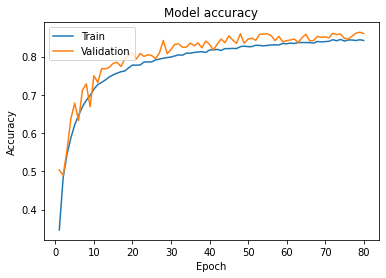

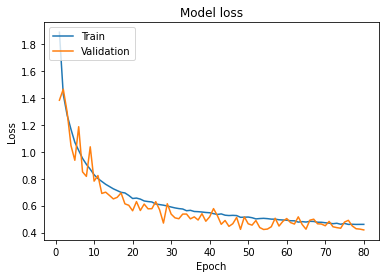

In [ ]:
# Plot training & validation accuracy values
epoch_range = range(1, 81)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Model evaluation

In [ ]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test,  y_test_cat, verbose=2)

313/313 - 18s - loss: 0.4193 - accuracy: 0.8603


##Prediction

In [ ]:
# Prediction on test data
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Type test image number12
[5] 5 Dog


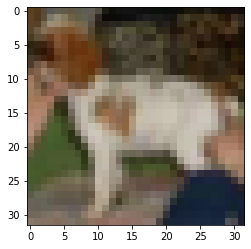

In [ ]:
# Prediction on single image
test_image = int(input('Type test image number'))
plt.imshow(X_test[test_image])
print(y_test[test_image], y_pred[test_image],classes_name[y_pred[test_image]])

##Plotting confusion matrix

In [ ]:
# Confusion matrix on test data
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[879,  15,  26,   6,   9,   0,  18,   8,  21,  18],
       [  5, 956,   0,   0,   0,   0,   3,   0,   3,  33],
       [ 30,   0, 756,  27,  37,  27,  99,  13,   4,   7],
       [ 14,   4,  26, 689,  29,  84, 102,  22,  12,  18],
       [  5,   1,  18,  13, 854,   9,  80,  17,   2,   1],
       [  1,   2,  15,  70,  31, 787,  58,  28,   1,   7],
       [  4,   1,   1,   6,   5,   0, 981,   2,   0,   0],
       [  5,   1,   9,  13,  40,  23,  18, 882,   2,   7],
       [ 41,  22,   4,   2,   2,   0,   9,   1, 886,  33],
       [ 13,  41,   3,   1,   0,   0,   5,   1,   3, 933]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd3d7396e10>)

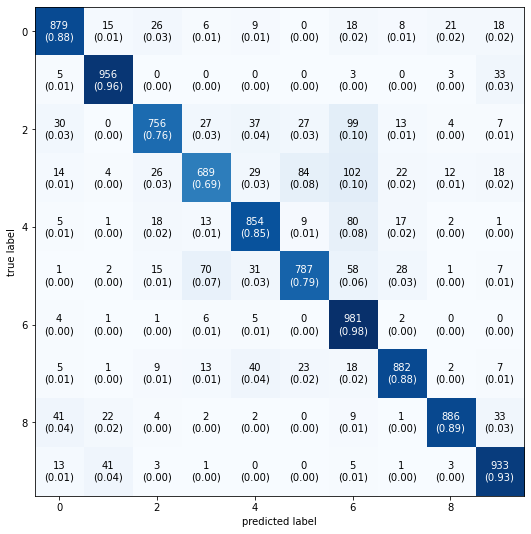

In [ ]:
# Confusion matrix plot
plot_confusion_matrix(confusion_mat,figsize=(9,9), show_normed=True)